In [707]:
import pandas as pd
import openai
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')
import json
import seaborn as sns
import string
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

In [708]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [709]:
with open('asrOutput_2.json', 'r') as f:
  data = json.load(f)


In [710]:
df = pd.DataFrame(data['results']['items'])

In [711]:
df['confidence'] = df.alternatives.map(lambda x: x[0]['confidence'])
df['content'] = df.alternatives.map(lambda x: x[0]['content'])

In [712]:
df_s0 = df[df['speaker_label'] == 'spk_0'].reset_index()

In [713]:
scam_text = ' '.join(df.content).replace(' .', '.').replace(' ,', ',').replace(' ?', '?').replace(' !', '!')
scam_text

'Hola. Soy representante de su banco. Hay un problema con su cuenta y necesitamos verificar su información de inmediato. A cuál es el problema exactamente? Puede darme más detalles? Eh, mire, hemos detectado actividad sospechosa en su cuenta y necesitamos confirmar su identidad para asegurarnos de que no se haya producido un fraude. Ok, entiendo. Eso es una preocupante. Y cómo puedo estar seguro de que realmente estás llamando desde mi banco? Y no se trata de una estafa, eh? Mira, por razones de seguridad, no puedo proporcionarte nuestra línea directa, pero puedo darte el número de atención al cliente general. Ok? Si ese es el caso, eh, Por favor dame el número del del banco para que yo pueda llamar directamente y verificar la situación. Ok? Eh, somos un departamento interno del banco y no podemos revelar nuestra identidad a través del teléfono.'

In [714]:

formato_json = """
{json:
{
  "score": ,
  "frases_clave_scam": [
    {
      "phrase": ,
      "score_scam": ,
      "justificacion": ,
      "recomendacion": ,
      "sentimiento": ,
    },
    {
      "phrase": ,
      "score_scam": ,
      "justificacion": ,
      "sentimiento": ,

    }
  ],
},
markdown: ]"""
prompt = f"""
Imagina que eres un modelo de inteligencia artificial de "scam detector". Évalua el siguiente texto entre comillas simples '{scam_text}' y realiza las siguientes tareas:
1. Identifica y extrae las frases potencialmente estafadoras dentro del texto sin modificar el texto original. Para cada una de las frases, haz las siguientes acciones: 
  1.1 Genera un score de estafa de un solo número con rango del 1 al 100 
  1.2 Justifica el score asignado en 10 palabras. 
  1.3 Agrega recomendiaciones particulares para cada frase.
  1.4 Agrega el sentimiento de cada frase en "Positivo", "Negativo"
2- Muestras los resultados en formato json con este formato: {formato_json}, en español.
"""
response = get_completion(prompt)
print(response)

{
  "score": 75,
  "frases_clave_scam": [
    {
      "phrase": "Hay un problema con su cuenta y necesitamos verificar su información de inmediato.",
      "score_scam": 80,
      "justificacion": "La frase genera sospecha al mencionar un problema urgente y solicitar información personal.",
      "recomendacion": "No proporcionar información personal sin verificar la autenticidad de la llamada.",
      "sentimiento": "Negativo"
    },
    {
      "phrase": "Hemos detectado actividad sospechosa en su cuenta y necesitamos confirmar su identidad.",
      "score_scam": 70,
      "justificacion": "La frase genera sospecha al mencionar actividad sospechosa sin detalles específicos.",
      "recomendacion": "No proporcionar información personal sin verificar la autenticidad de la llamada.",
      "sentimiento": "Negativo"
    },
    {
      "phrase": "No puedo proporcionarte nuestra línea directa, pero puedo darte el número de atención al cliente general.",
      "score_scam": 40,
      "just

In [746]:

prompt = f"""
Eres un experto en fraude telefónico, tu tarea es generar un reporte especializado en fraude utilizando la información encontrada en el siguiente json entre comillas simples '{response}'.
La salida debe ser código en Marckdownm con texto en español. El documento tiene que tener la siguiente información:
1. Título: 'ScamReport - ScamBusters'
3. Score de fraude de la llamada
4. No coloques introducción
4. Análisis de Frases Clave de Estafas Telefónicas
    - Frase fraudulenta
    - Score
    - Justificación
    - Recomendación
"""
response_md = get_completion(prompt)
print(response_md)

# ScamReport - ScamBusters

## Análisis de Frases Clave de Estafas Telefónicas

A continuación se presentan las frases clave identificadas en el archivo JSON, junto con su puntuación de estafa, justificación, recomendación y sentimiento asociado:

1. **Frase Clave:** "Hay un problema con su cuenta y necesitamos verificar su información de inmediato."
   - **Puntuación de Estafa:** 80
   - **Justificación:** Esta frase genera sospecha al mencionar un problema urgente y solicitar información personal.
   - **Recomendación:** No proporcionar información personal sin verificar la autenticidad de la llamada.
   - **Sentimiento:** Negativo

2. **Frase Clave:** "Hemos detectado actividad sospechosa en su cuenta y necesitamos confirmar su identidad."
   - **Puntuación de Estafa:** 70
   - **Justificación:** Esta frase genera sospecha al mencionar actividad sospechosa sin detalles específicos.
   - **Recomendación:** No proporcionar información personal sin verificar la autenticidad de la llama

In [747]:
with open('report.md', "w") as file:
    file.write(response_md)
file.close()

In [715]:
out = json.loads(response)
score = out['score']
phrases= pd.DataFrame(out['frases_clave_scam'])

In [716]:
phrases

,phrase,score_scam,justificacion,recomendacion,sentimiento
0,Hay un problema con su cuenta y necesitamos ve...,80,La frase genera sospecha al mencionar un probl...,No proporcionar información personal sin verif...,Negativo
1,Hemos detectado actividad sospechosa en su cue...,70,La frase genera sospecha al mencionar activida...,No proporcionar información personal sin verif...,Negativo
2,"No puedo proporcionarte nuestra línea directa,...",40,La frase genera sospecha al no proporcionar un...,Verificar la autenticidad del número de atenci...,Negativo
3,No podemos revelar nuestra identidad a través ...,60,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo


In [717]:
df

,start_time,speaker_label,end_time,alternatives,type,confidence,content
0,0.469,spk_0,0.819,"[{'confidence': '0.999', 'content': 'Hola'}]",pronunciation,0.999,Hola
1,NaN,spk_0,NaN,"[{'confidence': '0.0', 'content': '.'}]",punctuation,0.0,.
2,1.019,spk_0,1.22,"[{'confidence': '0.998', 'content': 'Soy'}]",pronunciation,0.998,Soy
3,1.23,spk_0,1.86,"[{'confidence': '0.995', 'content': 'represent...",pronunciation,0.995,representante
4,1.87,spk_0,1.96,"[{'confidence': '0.997', 'content': 'de'}]",pronunciation,0.997,de
...,...,...,...,...,...,...,...
164,55.279,spk_0,55.34,"[{'confidence': '0.992', 'content': 'a'}]",pronunciation,0.992,a
165,55.349,spk_0,55.63,"[{'confidence': '0.984', 'content': 'través'}]",pronunciation,0.984,través
166,55.639,spk_0,55.79,"[{'confidence': '0.983', 'content': 'del'}]",pronunciation,0.983,del
167,55.799,spk_0,56.24,"[{'confidence': '0.996', 'content': 'teléfono'}]",pronunciation,0.996,teléfono


In [718]:
phrases

,phrase,score_scam,justificacion,recomendacion,sentimiento
0,Hay un problema con su cuenta y necesitamos ve...,80,La frase genera sospecha al mencionar un probl...,No proporcionar información personal sin verif...,Negativo
1,Hemos detectado actividad sospechosa en su cue...,70,La frase genera sospecha al mencionar activida...,No proporcionar información personal sin verif...,Negativo
2,"No puedo proporcionarte nuestra línea directa,...",40,La frase genera sospecha al no proporcionar un...,Verificar la autenticidad del número de atenci...,Negativo
3,No podemos revelar nuestra identidad a través ...,60,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo


def get_time(x):
    

In [719]:
phrases['start_word'] = phrases.phrase.map(lambda x: x.split(' ')[0])
phrases['end_word'] = phrases.phrase.map(lambda x: x.split(' ')[-1])
phrases

,phrase,score_scam,justificacion,recomendacion,sentimiento,start_word,end_word
0,Hay un problema con su cuenta y necesitamos ve...,80,La frase genera sospecha al mencionar un probl...,No proporcionar información personal sin verif...,Negativo,Hay,inmediato.
1,Hemos detectado actividad sospechosa en su cue...,70,La frase genera sospecha al mencionar activida...,No proporcionar información personal sin verif...,Negativo,Hemos,identidad.
2,"No puedo proporcionarte nuestra línea directa,...",40,La frase genera sospecha al no proporcionar un...,Verificar la autenticidad del número de atenci...,Negativo,No,general.
3,No podemos revelar nuestra identidad a través ...,60,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo,No,teléfono.


In [720]:
df.speaker_label.value_counts()

speaker_label
spk_0    99
spk_1    70
Name: count, dtype: int64

In [721]:
df_s0.content = df_s0.content.str.lower()

In [722]:
df_s0[df_s0.content == 'hay']

,index,start_time,speaker_label,end_time,alternatives,type,confidence,content
8,8,2.9,spk_0,3.099,"[{'confidence': '0.997', 'content': 'Hay'}]",pronunciation,0.997,hay


In [723]:
times

[]

In [724]:
phrases['start_time'] = None
phrases['end_time'] = None
times = []
for index_phrase, phrase in enumerate(phrases.phrase):
    print('******** ',phrase)
    words = phrase.split(' ')
    first_word = words[0].lower()
    next_word = words[1].lower()
    nn_word  = words[2].lower()
    nnn_word  = words[3].lower()
    last_word  = words[-1].lower()
    temp_df = df_s0[df_s0.content == first_word]
    x= [first_word, next_word, nn_word]
    print('x: ', x)
    for i in temp_df.index: # Por cada frase
        print('y', df_s0.loc[i, 'content'], df_s0.loc[i +1, 'content'], df_s0.loc[i + 2, 'content'])
        sum = (df_s0.loc[i, 'content'] in x)  + (df_s0.loc[i +1, 'content'] in x)  +(df_s0.loc[i +2, 'content'] in x)  +(df_s0.loc[i + 3, 'content'] in x) 
        if sum >2 :
            print('yes')
            
            time  = df_s0.loc[i, 'start_time']
            print('++++time yest: ', time)
            if time not in times:
                phrases.loc[index_phrase, 'start_time'] = time
            else:
                print('++++time no: ', time)
                times.append(time)
            


********  Hay un problema con su cuenta y necesitamos verificar su información de inmediato.
x:  ['hay', 'un', 'problema']
y hay un problema
yes
++++time yest:  2.9
********  Hemos detectado actividad sospechosa en su cuenta y necesitamos confirmar su identidad.
x:  ['hemos', 'detectado', 'actividad']
y hemos detectado actividad
yes
++++time yest:  13.52
********  No puedo proporcionarte nuestra línea directa, pero puedo darte el número de atención al cliente general.
x:  ['no', 'puedo', 'proporcionarte']
y no se haya
y no puedo proporcionarte
yes
++++time yest:  34.06
y no podemos revelar
********  No podemos revelar nuestra identidad a través del teléfono.
x:  ['no', 'podemos', 'revelar']
y no se haya
y no puedo proporcionarte
y no podemos revelar
yes
++++time yest:  53.759


In [725]:
phrases

,phrase,score_scam,justificacion,recomendacion,sentimiento,start_word,end_word,start_time,end_time
0,Hay un problema con su cuenta y necesitamos ve...,80,La frase genera sospecha al mencionar un probl...,No proporcionar información personal sin verif...,Negativo,Hay,inmediato.,2.9,None
1,Hemos detectado actividad sospechosa en su cue...,70,La frase genera sospecha al mencionar activida...,No proporcionar información personal sin verif...,Negativo,Hemos,identidad.,13.52,None
2,"No puedo proporcionarte nuestra línea directa,...",40,La frase genera sospecha al no proporcionar un...,Verificar la autenticidad del número de atenci...,Negativo,No,general.,34.06,None
3,No podemos revelar nuestra identidad a través ...,60,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo,No,teléfono.,53.759,None


In [726]:
phrases['score_scam'] = phrases['score_scam'].astype(float)
phrases['start_time'] = phrases['start_time'].astype(float)

In [727]:

phrases['emoji'] = phrases['sentimiento'].map(lambda x: '😃' if x == 'feliz' else '☹️' )

In [728]:
def format_phrase(x, num= 5):
    x = x.split(' ')
    len_x = len(x)
    txt = ''
    for i, palabra in enumerate(x):
        if i == 0:
            txt = palabra + ' '
        elif i%num == 0:
            txt = txt + '\n' + palabra
        else:
            txt = txt + ' ' + palabra
    print(txt)
    return txt

In [729]:
phrases.phrase = phrases.phrase.map(lambda x: format_phrase(x))

Hay  un problema con su
cuenta y necesitamos verificar su
información de inmediato.
Hemos  detectado actividad sospechosa en
su cuenta y necesitamos confirmar
su identidad.
No  puedo proporcionarte nuestra línea
directa, pero puedo darte el
número de atención al cliente
general.
No  podemos revelar nuestra identidad
a través del teléfono.


In [730]:
df_temp

,phrase,score_scam,justificacion,recomendacion,sentimiento,start_word,end_word,start_time,end_time,emoji
0,Hay un problema con\n y necesitamos verifica...,80.0,La frase genera sospecha al mencionar un probl...,No proporcionar información personal sin verif...,Negativo,Hay,inmediato.,2.900,None,☹️
1,Hemos detectado actividad sospechosa\n cuent...,70.0,La frase genera sospecha al mencionar activida...,No proporcionar información personal sin verif...,Negativo,Hemos,identidad.,13.520,None,☹️
2,No puedo proporcionarte nuestra\n pero puedo...,40.0,La frase genera duda al no proporcionar una lí...,Verificar la autenticidad del número de atenci...,Negativo,No,general.,53.759,None,☹️
3,No podemos revelar nuestra\n través del telé...,60.0,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo,No,teléfono.,53.759,None,☹️
4,No podemos revelar nuestra\n través del telé...,60.0,La frase genera sospecha al no revelar la iden...,No proporcionar información personal sin verif...,Negativo,No,teléfono.,NaN,None,☹️


In [731]:
for i in df_temp.phrase:
    print(i)

Hay   un problema con
 y necesitamos verificar su

 inmediato.
Hemos   detectado actividad sospechosa
 cuenta y necesitamos confirmar


No   puedo proporcionarte nuestra
 pero puedo darte el

 atención al cliente

No   podemos revelar nuestra
 través del teléfono.
No   podemos revelar nuestra
 través del teléfono.


/var/folders/r4/g6b0q1650fdbyb5v7h56z8vr0000gn/T/ipykernel_71337/3491547938.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  _ = plt.annotate(phrase, xy=(x,y), xytext=(x, y - 30),
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.
findfont: Font family 'Segoe UI Emoji' not found.


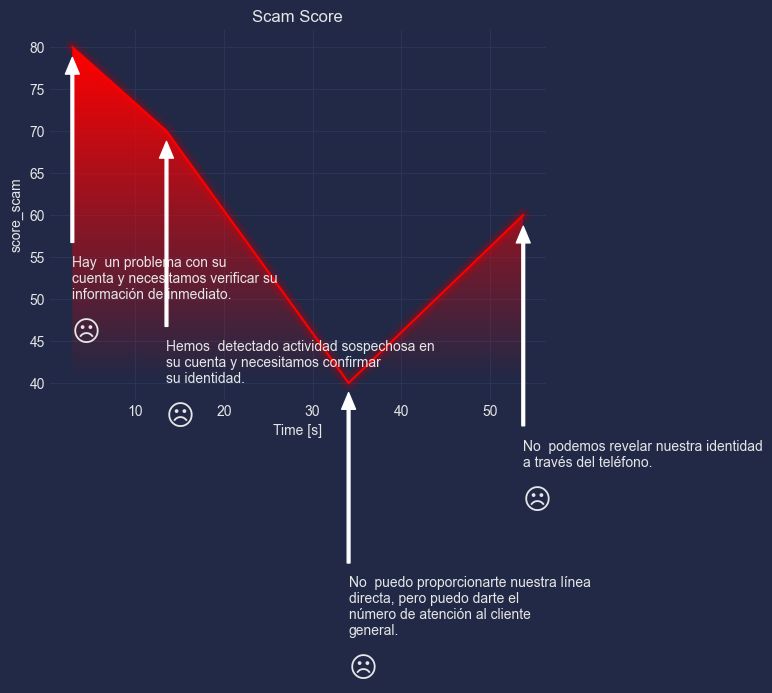

In [732]:
df_temp = phrases.copy()
df_temp.loc[len(df_temp.index)] = df_temp.iloc[-1]
df_temp.loc[len(df_temp.index) - 1, 'start_time'] = df_temp.loc[len(df_temp.index) - 1, 'end_time']
plot = sns.lineplot(data=df_temp, x = 'start_time', y = 'score_scam', color = 'r').set(title='Scam Score')
for i in phrases.index:
    x = float(phrases.loc[i, 'start_time'])
    y = float(phrases.loc[i, 'score_scam'])
    text = phrases.loc[i, 'emoji']
    phrase = phrases.loc[i, 'phrase']

    _ = plt.annotate(phrase, xy=(x,y), xytext=(x, y - 30),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=10, width=2, color = 'white'))
    
    _ = plt.annotate(text, xy=(x,y), xytext=(x, y - 35),
             fontname='Segoe UI Emoji', # this is the param added
        fontsize=20)
plt.xlabel("Score")
plt.xlabel("Time [s]")
#plt.xlim(0,phrases.end_time.max())
mplcyberpunk.add_glow_effects(gradient_fill=True)